<a href="https://colab.research.google.com/github/NeelayS/ppe-detection/blob/main/annotations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%cd /content/drive/MyDrive/projects/frinks/data/ppe

/content/drive/MyDrive/projects/frinks/data/ppe


In [ ]:
!git clone https://github.com/eriklindernoren/PyTorch-YOLOv3

fatal: destination path 'PyTorch-YOLOv3' already exists and is not an empty directory.
/bin/bash: -c: line 0: syntax error near unexpected token `&&'
/bin/bash: -c: line 0: `cd PyTorch-YOLOv3/ && && poetry install'


In [ ]:
!pip3 install poetry --user 
!cd PyTorch-YOLOv3/ && && poetry install

/bin/bash: -c: line 0: syntax error near unexpected token `&&'
/bin/bash: -c: line 0: `cd PyTorch-YOLOv3/ && && poetry install'


In [ ]:
!pip3 install pytorchyolo --user

     |████████████████████████████████| 42 kB 1.0 MB/s 
     |████████████████████████████████| 948 kB 42.8 MB/s 
     |████████████████████████████████| 11.2 MB 51.0 MB/s 
     |████████████████████████████████| 3.1 MB 53.9 MB/s 
     |████████████████████████████████| 900 kB 35.4 MB/s 
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.4.0 which is incompatible.


In [ ]:
!ls

 annotations.ipynb	        images		    'PUNCH IN POINT HRD.mp4'
'Contract worker Punchin.mp4'   images_annotations   PyTorch-YOLOv3
'CRD GATE ENTRY.mp4'	       'PUNCH CRD.mp4'	     test.jpg


In [ ]:
!cd PyTorch-YOLOv3 && bash weights/download_weights.sh

--2022-04-19 15:34:27--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  39.6MB/s    in 6.0s    

2022-04-19 15:34:33 (39.6 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]

--2022-04-19 15:34:33--  https://pjreddie.com/media/files/yolov3-tiny.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35434956 (34M) [application/octet-stream]
Saving to: ‘yolov3-tiny.weights’

yolov3-tiny.weights 100%[===================>]  33.79M  33.3MB/s    in 1.0s    

2022-04-19 15:34:35 (33.3 MB/s) - ‘yolov3-tiny.weights’ saved [35434956/35434956]

--202

In [ ]:
!mkdir images_annotations

In [ ]:
import cv2
from pytorchyolo import detect, models
import matplotlib.pyplot as plt
import os
import pickle

In [ ]:
model = models.load_model(
  "PyTorch-YOLOv3/config/yolov3.cfg", 
  "PyTorch-YOLOv3/weights/yolov3.weights")

In [ ]:
!ls images

In [ ]:
img = cv2.imread("images/Contract worker Punchin img001.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
boxes = detect.detect_image(model, img)
print(boxes)

[[1.23463708e+03 8.34149109e+02 1.67215454e+03 1.73111218e+03
  9.99216914e-01 0.00000000e+00]
 [1.52925098e+03 1.88857285e+02 1.64415576e+03 5.55552856e+02
  9.89631474e-01 0.00000000e+00]
 [9.15501892e+02 4.04221375e+02 1.12846594e+03 1.03154663e+03
  9.88139451e-01 0.00000000e+00]
 [9.72424683e+02 7.51834473e+02 1.27579224e+03 1.61956506e+03
  9.87373054e-01 0.00000000e+00]
 [1.88185767e+03 4.30509583e+02 2.08304346e+03 1.23505847e+03
  9.86739874e-01 0.00000000e+00]
 [2.31325977e+03 1.00448724e+03 2.83522021e+03 1.75473804e+03
  9.72036242e-01 0.00000000e+00]
 [1.23386780e+03 4.08951477e+02 1.46663196e+03 9.36817627e+02
  9.63590920e-01 0.00000000e+00]
 [1.36284961e+03 6.31670471e+02 1.66820312e+03 1.19995654e+03
  8.36391509e-01 0.00000000e+00]
 [1.83588745e+03 2.55928543e+02 2.02931152e+03 6.28291016e+02
  8.12778354e-01 0.00000000e+00]
 [1.71850708e+03 1.30723953e+02 1.76416663e+03 2.37768875e+02
  7.94929504e-01 0.00000000e+00]
 [1.38482471e+03 3.21621643e+02 1.51096936e+03 6.3

In [ ]:
len(boxes)

16

In [ ]:
tuple(map(int, boxes[0][:2]))

(1234, 834)

In [ ]:
a = tuple(map(int, boxes[0][:2]))
b = tuple(map(int, boxes[0][2:4]))
a, b

((1234, 834), (1672, 1731))

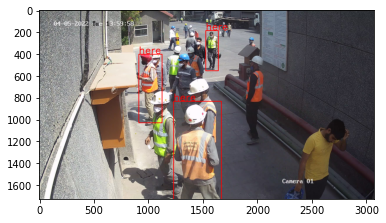

In [ ]:
# img = cv2.imread("images/Contract worker Punchin img001.jpg")
img = cv2.rectangle(img, a, b, (255, 0, 0), 5)
start_x = a[0]
start_y = a[1]
start_y = start_y - 5 if start_y - 5 > 5 else start_y + 5
cv2.putText(img, "here", (start_x, start_y), cv2.FONT_HERSHEY_SIMPLEX, 3, (255, 0, 0), 5)
plt.imshow(img)

In [ ]:
cv2.imwrite("test.jpg", img)

True

In [ ]:
img_dir = "images"
save_dir = "images_annotations"

In [ ]:
img_annotations = {}
confidence_threshold = 0.75

for img_path in sorted(os.listdir(img_dir)):

  print(f"Processing image {img_path}")

  img = cv2.imread(os.path.join(img_dir, img_path))
  img_r = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  boxes = detect.detect_image(model, img_r)

  annotation = []

  for i, box in enumerate(boxes):

    if not int(box[-1]) == 0: # person class
      continue

    if not box[-2] > confidence_threshold:
      continue

    x1, y1 = tuple(map(int, box[:2]))
    x2, y2 = tuple(map(int, box[2:4]))
    
    img = cv2.rectangle(img, (x1, y1), (x2, y2), (0, 0, 255), 5)

    text_y = y1 - 5 if y1 - 5 > 5 else y1 + 5
    cv2.putText(img, "P"+str(i), (x1, text_y), cv2.FONT_HERSHEY_SIMPLEX, 3, (0, 0, 255), 5)

    annotation.append(
        ("P"+str(i), x1, y1, x2, y2)
    )

  cv2.imwrite(os.path.join(save_dir, img_path), img)
  img_annotations[img_path] = annotation

with open("img_annotations.pkl", "wb") as f:
  pickle.dump(img_annotations, f)

Processing image CRD GATE ENTRY img001.jpg
Processing image CRD GATE ENTRY img002.jpg
Processing image CRD GATE ENTRY img003.jpg
Processing image CRD GATE ENTRY img004.jpg
Processing image CRD GATE ENTRY img005.jpg
Processing image CRD GATE ENTRY img006.jpg
Processing image CRD GATE ENTRY img007.jpg
Processing image CRD GATE ENTRY img008.jpg
Processing image CRD GATE ENTRY img009.jpg
Processing image CRD GATE ENTRY img010.jpg
Processing image CRD GATE ENTRY img011.jpg
Processing image CRD GATE ENTRY img012.jpg
Processing image CRD GATE ENTRY img013.jpg
Processing image CRD GATE ENTRY img014.jpg
Processing image CRD GATE ENTRY img015.jpg
Processing image CRD GATE ENTRY img016.jpg
Processing image CRD GATE ENTRY img017.jpg
Processing image CRD GATE ENTRY img018.jpg
Processing image CRD GATE ENTRY img019.jpg
Processing image CRD GATE ENTRY img020.jpg
Processing image CRD GATE ENTRY img021.jpg
Processing image CRD GATE ENTRY img022.jpg
Processing image CRD GATE ENTRY img023.jpg
Processing 

NameError: ignored

In [ ]:
!ls "images" | wc -l

1052


In [ ]:
!ls "images_annotations" | wc -l

1052


In [ ]:
img_annotations[list(img_annotations.keys())[0]]

[('P0', 1069, 674, 1573, 1593),
 ('P1', 1233, 1137, 1838, 1733),
 ('P2', 1723, 768, 2142, 1740),
 ('P3', 2508, 892, 2770, 1434),
 ('P5', 1312, 250, 1345, 343),
 ('P6', 1983, 747, 2199, 1751),
 ('P7', 1194, 258, 1232, 350)]

In [ ]:
a = ('P0', 1069, 674, 1573, 1593)
a = list(map(str, a))
",".join(a)

'P0,1069,674,1573,1593'

In [ ]:
with open("img_annotations.pkl", "wb") as f:
  pickle.dump(img_annotations, f)

In [ ]:
with open("img_annotations.pkl", "rb") as f:
  img_annotations = pickle.load(f)
  
print(type(img_annotations), len(img_annotations))

<class 'dict'> 1052


In [ ]:
f = open("annotations.txt", "w")

for img in img_annotations.keys():

  s = img

  for annotation in img_annotations[img]:

    s += "\t"
    annotation_str = ",".join(list(map(str, annotation)))
    s += annotation_str

  f.write(s)
  f.write("\n")

f.close()

In [ ]:
with open("annotations.txt", "r") as f:
  annotations = f.readlines()
  print(annotations)
  print(len(annotations))

['CRD GATE ENTRY img001.jpg\tP0,1069,674,1573,1593\tP1,1233,1137,1838,1733\tP2,1723,768,2142,1740\tP3,2508,892,2770,1434\tP5,1312,250,1345,343\tP6,1983,747,2199,1751\tP7,1194,258,1232,350\n', 'CRD GATE ENTRY img002.jpg\tP0,906,675,1421,1655\tP1,1779,690,2148,1710\tP2,1600,555,1871,1454\n', 'CRD GATE ENTRY img003.jpg\tP0,1120,636,1673,1698\tP1,1834,428,2000,991\tP2,1673,494,1811,1045\tP3,1544,483,1717,1053\n', 'CRD GATE ENTRY img004.jpg\tP0,841,668,1445,1706\tP1,1162,476,1358,909\tP3,1528,445,1676,837\tP4,1624,370,1722,600\n', 'CRD GATE ENTRY img005.jpg\tP0,1744,913,2167,1696\tP1,1022,670,1454,1681\tP4,1163,443,1345,850\tP5,1259,255,1302,351\n', 'CRD GATE ENTRY img006.jpg\tP0,1158,662,1612,1708\tP1,1213,450,1313,735\tP3,1254,264,1286,346\n', 'CRD GATE ENTRY img007.jpg\tP0,1095,582,1648,1718\tP3,1249,260,1282,354\n', 'CRD GATE ENTRY img008.jpg\tP0,982,601,1512,1700\n', 'CRD GATE ENTRY img009.jpg\tP0,1824,686,2151,1689\tP1,978,607,1514,1727\n', 'CRD GATE ENTRY img010.jpg\tP0,1021,581,1520